In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Data to analize: load, clean and prepare

In [5]:
data = pd.read_csv('/content/drive/MyDrive/knn/hotel_booking.csv', encoding='ISO-8859-1')

In [ ]:
data.head(3)
data

In [6]:
# Remove duplicates
data.drop_duplicates(inplace=True)

In [7]:
# Analized fields:
data = data.loc[:,['is_canceled', 'lead_time', 'arrival_date_month', 'arrival_date_year', 'stays_in_weekend_nights', 'stays_in_week_nights',
                    'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled',
                    'booking_changes', 'required_car_parking_spaces', 'total_of_special_requests']].copy()

In [8]:
# Repleacing months with numbers:
data['arrival_date_month']=data['arrival_date_month'].replace('January',1).replace('February',2).replace('March',3).replace('April',4).replace('May',5).replace('June',6).replace('July',7).replace('August',8).replace('September',9).replace('October',10).replace('November',11).replace('December',12)

In [9]:
# Remove NaN:
data.dropna(inplace=True)

In [ ]:
# Check if there are only numbers:
data.sum(axis=0)

In [11]:
# Data scaling
sc = StandardScaler()
hotel_x = sc.fit_transform(data)

In [12]:
# Outcome:
canceled_y = data['is_canceled']

In [13]:
# Data split
X_train,X_test,y_train,y_test = train_test_split(hotel_x, canceled_y, test_size=0.3, random_state=42, stratify=canceled_y)

# Classification (KNN)

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

In [ ]:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

In [16]:
y_pred = classifier.predict(X_test)

In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [20]:
# error rate based on https://www.kaggle.com/code/aishu2218/let-s-understand-knn-classification
error_rate = []

for i in range(1,5):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    error_rate.append(np.mean(pred != y_test))

Text(0, 0.5, 'Mean Error')

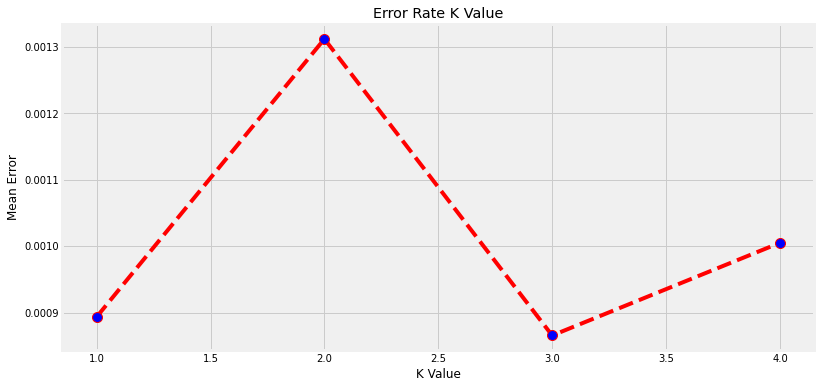

In [24]:
plt.figure(figsize=(12, 6))
plt.plot(range(1,5), error_rate, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')